## 다음 분기에 어떤 게임을 설계해야 할까
### 목차
1. 데이터 전처리
2. 지역에 따라서 선호하는 게임의 장르가 다를까
3. 연도별 게임의 트렌드가 있을까
4. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
5. 플랫폼 별 장르가 차이가 있을것인가?
6. 회사별 주력하는 장르 및 플랫폼
7. 프로젝트 활용 방향

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:/Users/dhckd/Study/CodingWorld/Codestates/Projects/project1/dataset/new_data.csv", index_col = 0)

In [3]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


- Year를 float에서 int형으로 미리 형 변환

In [4]:
df = df.astype({'Year':'int'})

### 1. 지역에 따라서 선호하는 게임 장르가 다를까
- 지역에 따른 선호도를 출고량(Sales)으로 파악하고자 하였다. 이에 장르별로 데이터를 그룹화한 뒤, 다시 지역별로 장르별 출고량을 확인해보았다.
1. 먼저 장르별로 데이터 그룹화
2. '선호도'를 어떻게 측정할 것인가 -> Sales를 통해 측정
3. 각 지역별 특징 분석 및 선호도 시각화

In [5]:
# 장르종류 파악
df['Genre'].value_counts()

Action          3226
Sports          2289
Misc            1671
Role-Playing    1458
Shooter         1269
Adventure       1264
Racing          1209
Platform         865
Simulation       841
Fighting         829
Strategy         664
Puzzle           558
Name: Genre, dtype: int64

In [91]:
# 총 12개의 장르. 이 12개를 기준으로 그룹화
# 필터링을 활용해서 데이터 나눔
filter1 = df.Genre == 'Action'
df_action = df.loc[filter1]

filter2 = df.Genre == 'Sports'
df_sports = df.loc[filter2]

filter3 = df.Genre == 'Misc'
df_misc = df.loc[filter3]

filter4 = df.Genre == 'Role-Playing'
df_roleplaying = df.loc[filter4]

filter5 = df.Genre == 'Shooter'
df_shooter = df.loc[filter5]

filter6 = df.Genre == 'Adventure'
df_adventure = df.loc[filter6]

filter7 = df.Genre == 'Racing'
df_racing = df.loc[filter7]

filter8 = df.Genre == 'Platform'
df_platform = df.loc[filter8]

filter9 = df.Genre == 'Simulation'
df_simulation = df.loc[filter9]

filter10 = df.Genre == 'Fighting'
df_fighting = df.loc[filter10]

filter11 = df.Genre == 'Strategy'
df_strategy = df.loc[filter11]

filter12 = df.Genre == 'Puzzle'
df_puzzle = df.loc[filter12]

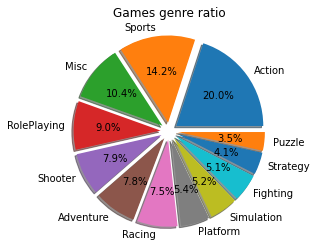

In [92]:
labels =  ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
result = [len(df_action), len(df_sports), len(df_misc), len(df_roleplaying), len(df_shooter), len(df_adventure), len(df_racing), len(df_platform), len(df_simulation), len(df_fighting), len(df_strategy), len(df_puzzle)]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(result, explode = explode, labels = labels, autopct = '%.1f%%', shadow = True)
plt.title('Games genre ratio')
plt.show()

- 잘 나뉘었는지 Action장르 확인

In [7]:
df_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01
16,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06
...,...,...,...,...,...,...,...,...,...
16576,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08
16582,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02
16584,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00


- 지역별 Action장르 총 Sales 합

In [8]:
NA_Sales_Action_sum = df_action.NA_Sales.sum()
EU_Sales_Action_sum = df_action.EU_Sales.sum()
JP_Sales_Action_sum = df_action.JP_Sales.sum()
Other_Sales_Action_sum = df_action.Other_Sales.sum()

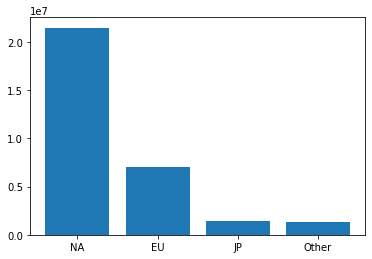

In [9]:
# Action장르의 지역별 출고량
location = ['NA', 'EU', 'JP', 'Other']
values = [NA_Sales_Action_sum, EU_Sales_Action_sum, JP_Sales_Action_sum, Other_Sales_Action_sum]

plt.bar(location, values)
plt.show()

### 1.1 NA 지역의 장르별 출고량 수

In [10]:
NA_Sales_Action_sum = df_action.NA_Sales.sum()

NA_Sales_Sports_sum = df_sports.NA_Sales.sum()

NA_Sales_Misc_sum = df_misc.NA_Sales.sum()

NA_Sales_roleplaying_sum = df_roleplaying.NA_Sales.sum()

NA_Sales_Shooter_sum = df_shooter.NA_Sales.sum()

NA_Sales_Adventure_sum = df_adventure.NA_Sales.sum()

NA_Sales_Racing_sum = df_racing.NA_Sales.sum()

NA_Sales_Platform_sum = df_platform.NA_Sales.sum()

NA_Sales_Simulation_sum = df_simulation.NA_Sales.sum()

NA_Sales_Fighting_sum = df_fighting.NA_Sales.sum()

NA_Sales_Strategy_sum = df_strategy.NA_Sales.sum()

NA_Sales_Puzzle_sum = df_puzzle.NA_Sales.sum()

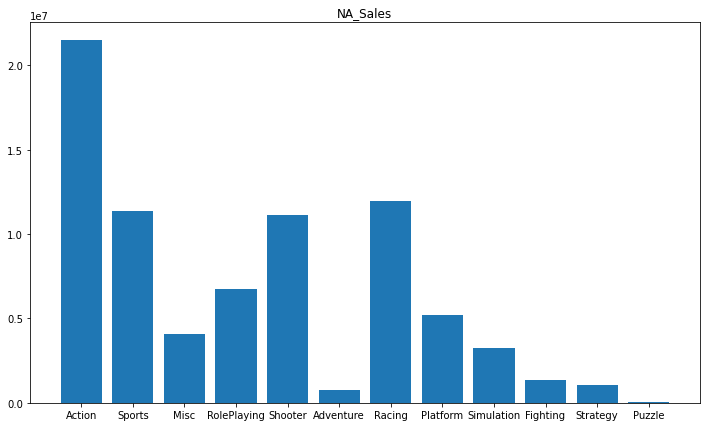

In [35]:
gen = ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
NA_sales_num = [NA_Sales_Action_sum, NA_Sales_Sports_sum, NA_Sales_Misc_sum, NA_Sales_roleplaying_sum, NA_Sales_Shooter_sum, NA_Sales_Adventure_sum, NA_Sales_Racing_sum, NA_Sales_Platform_sum, NA_Sales_Simulation_sum, NA_Sales_Fighting_sum, NA_Sales_Strategy_sum, NA_Sales_Puzzle_sum]

plt.figure(figsize = (12, 7))
plt.bar(gen, NA_sales_num)
plt.title('NA_Sales')
plt.show()

### 1.2 EU 지역의 장르별 출고량 수

In [14]:
EU_Sales_Action_sum = df_action.EU_Sales.sum()

EU_Sales_Sports_sum = df_sports.EU_Sales.sum()

EU_Sales_Misc_sum = df_misc.EU_Sales.sum()

EU_Sales_roleplaying_sum = df_roleplaying.EU_Sales.sum()

EU_Sales_Shooter_sum = df_shooter.EU_Sales.sum()

EU_Sales_Adventure_sum = df_adventure.EU_Sales.sum()

EU_Sales_Racing_sum = df_racing.EU_Sales.sum()

EU_Sales_Platform_sum = df_platform.EU_Sales.sum()

EU_Sales_Simulation_sum = df_simulation.EU_Sales.sum()

EU_Sales_Fighting_sum = df_fighting.EU_Sales.sum()

EU_Sales_Strategy_sum = df_strategy.EU_Sales.sum()

EU_Sales_Puzzle_sum = df_puzzle.EU_Sales.sum()

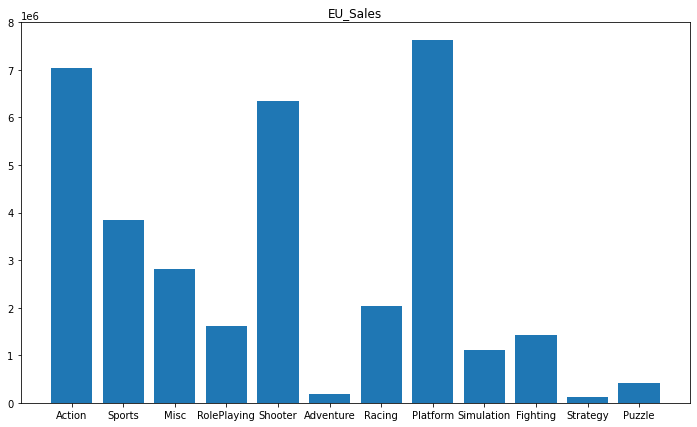

In [34]:
gen = ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
EU_sales_num = [EU_Sales_Action_sum, EU_Sales_Sports_sum, EU_Sales_Misc_sum, EU_Sales_roleplaying_sum, EU_Sales_Shooter_sum, EU_Sales_Adventure_sum, EU_Sales_Racing_sum, EU_Sales_Platform_sum, EU_Sales_Simulation_sum, EU_Sales_Fighting_sum, EU_Sales_Strategy_sum, EU_Sales_Puzzle_sum]

plt.figure(figsize = (12, 7))
plt.bar(gen, EU_sales_num)
plt.title('EU_Sales')
plt.show()

### 1.2 JP 지역의 장르별 출고량 수

In [16]:
JP_Sales_Action_sum = df_action.JP_Sales.sum()

JP_Sales_Sports_sum = df_sports.JP_Sales.sum()

JP_Sales_Misc_sum = df_misc.JP_Sales.sum()

JP_Sales_roleplaying_sum = df_roleplaying.JP_Sales.sum()

JP_Sales_Shooter_sum = df_shooter.JP_Sales.sum()

JP_Sales_Adventure_sum = df_adventure.JP_Sales.sum()

JP_Sales_Racing_sum = df_racing.JP_Sales.sum()

JP_Sales_Platform_sum = df_platform.JP_Sales.sum()

JP_Sales_Simulation_sum = df_simulation.JP_Sales.sum()

JP_Sales_Fighting_sum = df_fighting.JP_Sales.sum()

JP_Sales_Strategy_sum = df_strategy.JP_Sales.sum()

JP_Sales_Puzzle_sum = df_puzzle.JP_Sales.sum()

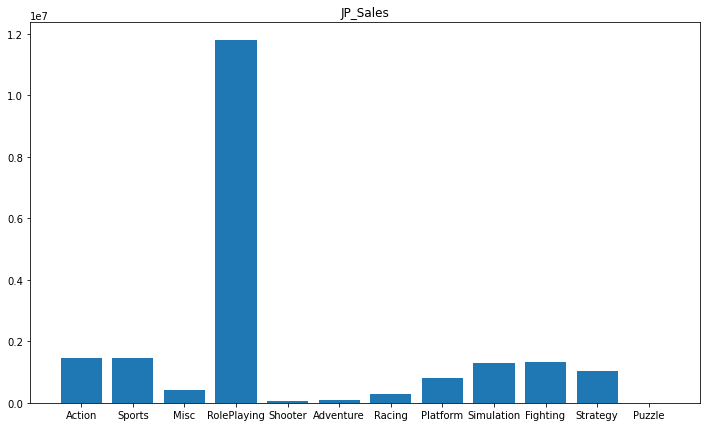

In [33]:
gen = ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
JP_sales_num = [JP_Sales_Action_sum, JP_Sales_Sports_sum, JP_Sales_Misc_sum, JP_Sales_roleplaying_sum, JP_Sales_Shooter_sum, JP_Sales_Adventure_sum, JP_Sales_Racing_sum, JP_Sales_Platform_sum, JP_Sales_Simulation_sum, JP_Sales_Fighting_sum, JP_Sales_Strategy_sum, JP_Sales_Puzzle_sum]

plt.figure(figsize = (12, 7))
plt.bar(gen, JP_sales_num)
plt.title('JP_Sales')
plt.show()

### 1.4 Other 지역의 장르별 출고량 수

In [18]:
Other_Sales_Action_sum = df_action.Other_Sales.sum()

Other_Sales_Sports_sum = df_sports.Other_Sales.sum()

Other_Sales_Misc_sum = df_misc.Other_Sales.sum()

Other_Sales_roleplaying_sum = df_roleplaying.Other_Sales.sum()

Other_Sales_Shooter_sum = df_shooter.Other_Sales.sum()

Other_Sales_Adventure_sum = df_adventure.Other_Sales.sum()

Other_Sales_Racing_sum = df_racing.Other_Sales.sum()

Other_Sales_Platform_sum = df_platform.Other_Sales.sum()

Other_Sales_Simulation_sum = df_simulation.Other_Sales.sum()

Other_Sales_Fighting_sum = df_fighting.Other_Sales.sum()

Other_Sales_Strategy_sum = df_strategy.Other_Sales.sum()

Other_Sales_Puzzle_sum = df_puzzle.Other_Sales.sum()

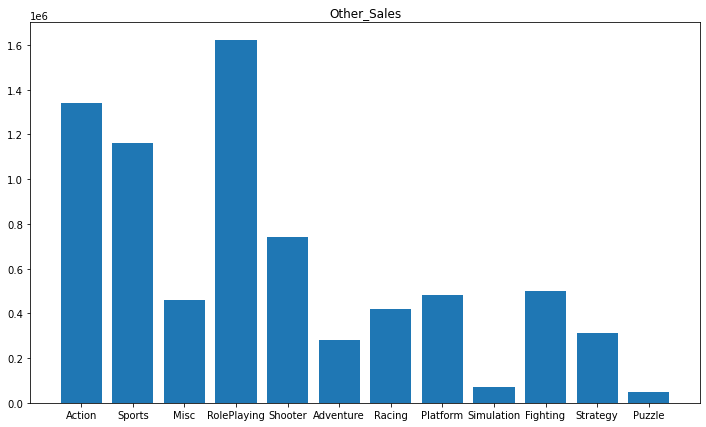

In [32]:
gen = ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
Other_sales_num = [Other_Sales_Action_sum, Other_Sales_Sports_sum, Other_Sales_Misc_sum, Other_Sales_roleplaying_sum, Other_Sales_Shooter_sum, Other_Sales_Adventure_sum, Other_Sales_Racing_sum, Other_Sales_Platform_sum, Other_Sales_Simulation_sum, Other_Sales_Fighting_sum, Other_Sales_Strategy_sum, Other_Sales_Puzzle_sum]

plt.figure(figsize = (12, 7))
plt.bar(gen, Other_sales_num)
plt.title('Other_Sales')
plt.show()

- 지역별 데이터 셋 만들기

In [20]:
df_NA_sales_num = pd.DataFrame(NA_sales_num)
df_EU_sales_num = pd.DataFrame(EU_sales_num)
df_JP_sales_num = pd.DataFrame(JP_sales_num)
df_Other_sales_num = pd.DataFrame(Other_sales_num)

In [21]:
df_new = pd.concat([df_NA_sales_num, df_EU_sales_num, df_JP_sales_num, df_Other_sales_num], axis = 1)

In [22]:
df_new.columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [23]:
df_new.index = ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']

In [24]:
df_new

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,21470834.49,7030505.49,1440154.29,1340182.30
Sports,11340652.99,3840365.85,1450133.13,1160130.57
Misc,4090390.20,2820204.86,420103.29,460072.08
RolePlaying,6770305.48,1610178.75,11780328.81,1620053.88
Shooter,11130560.34,6340301.14,60037.28,740100.11
Adventure,760100.57,190063.13,80051.71,280016.36
Racing,11950341.62,2040232.16,280055.14,420075.81
Platform,5220437.24,7620191.78,790128.43,480050.67
Simulation,3240177.80,1110111.57,1280062.18,70031.17
Fighting,1360218.75,1420098.30,1340085.05,500035.60


In [25]:
df_new = df_new.T

In [26]:
df_new

,Action,Sports,Misc,RolePlaying,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle
NA_Sales,21470834.49,11340652.99,4090390.20,6770305.48,11130560.34,760100.57,11950341.62,5220437.24,3240177.80,1360218.75,1050066.77,70120.93
EU_Sales,7030505.49,3840365.85,2820204.86,1610178.75,6340301.14,190063.13,2040232.16,7620191.78,1110111.57,1420098.30,120044.58,410049.98
JP_Sales,1440154.29,1450133.13,420103.29,11780328.81,60037.28,80051.71,280055.14,790128.43,1280062.18,1340085.05,1040047.09,56.19
Other_Sales,1340182.30,1160130.57,460072.08,1620053.88,740100.11,280016.36,420075.81,480050.67,70031.17,500035.60,310010.89,50012.34


### - 지역별 장르의 출고량 차이가 있을지 확인해보자
- 귀무가설: 지역별 평균 Action장르 출고량과 Sports장르 출고량은 차이가 없을 것이다
- 먼저 장르 Action과 Sports에 대해 Two-Sample T-test를 진행

In [27]:
stats.ttest_ind(df_new['Action'], df_new['Sports'])

Ttest_indResult(statistic=0.6360995115613219, pvalue=0.5481924822440591)

- p value가 0.54로, 0.05보다 큰 것을 볼 수 있다.
- 그렇기에 귀무가설을 기각하고 "지역별 평균 Action장르 출고량과 Sports장르 출고량은 차이가 있다"고 판단할 수 있다.

### 2. 연도별 게임 트렌드가 있을까

- 연도의 최소값과 최대값

In [28]:
print("데이터에는", df.Year.min(), "년부터", df.Year.max(), "년까지의 게임이 들어있습니다.")

데이터에는 1980 년부터 2020 년까지의 게임이 들어있습니다.


### '게임 트렌드'라는 것을 어떻게 볼 것인가?
- 1. 각 12개 장르의 연도별 출고량 추세를 파악하여 트렌드를 볼 수 있을 것이다.
- 2. 장르별 출시 게임 수를 파악하여 트렌드를 볼 수 있을 것이다.

### 2.1 각 장르의 연도별 출고량

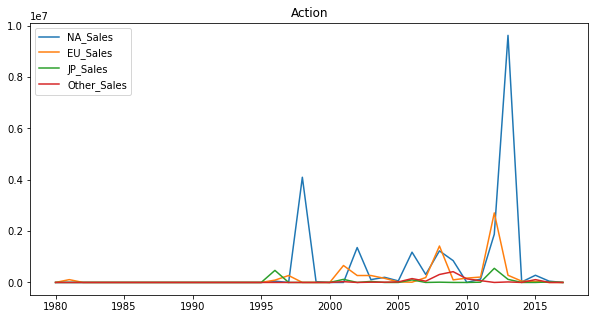

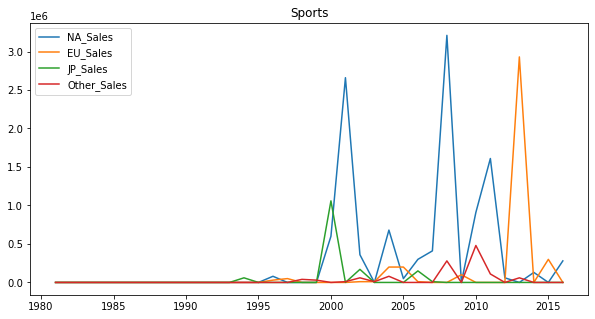

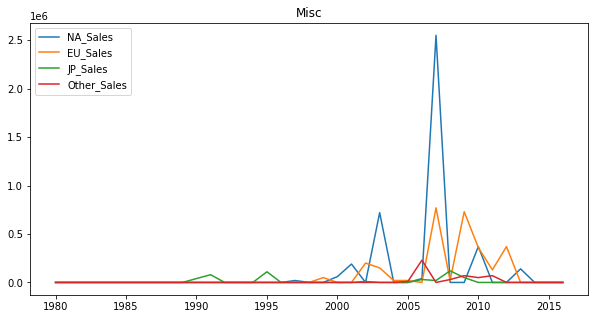

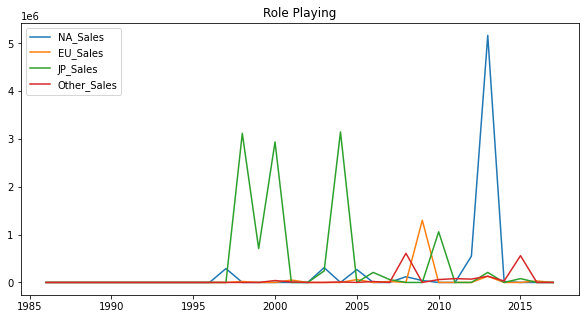

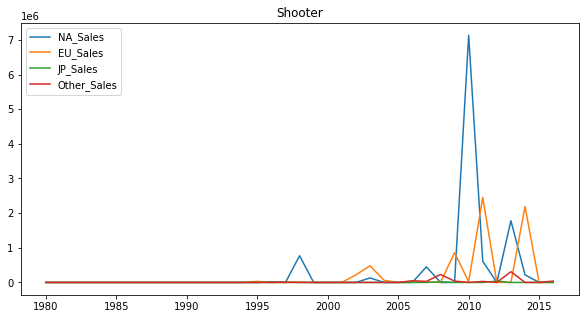

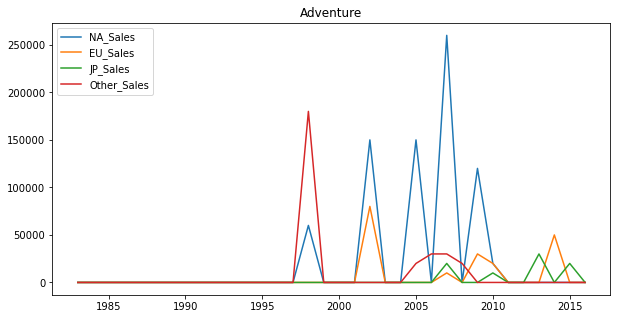

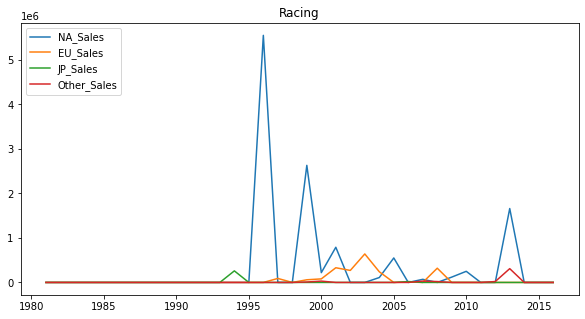

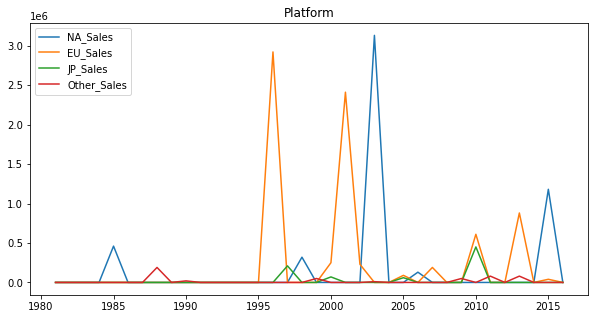

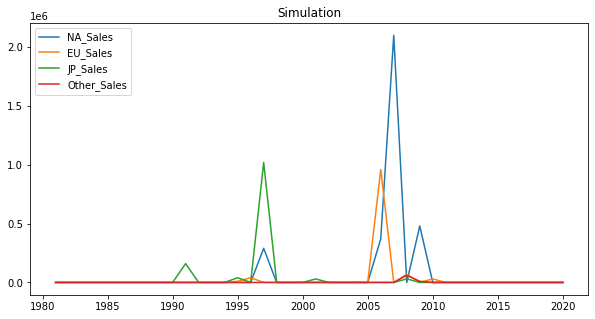

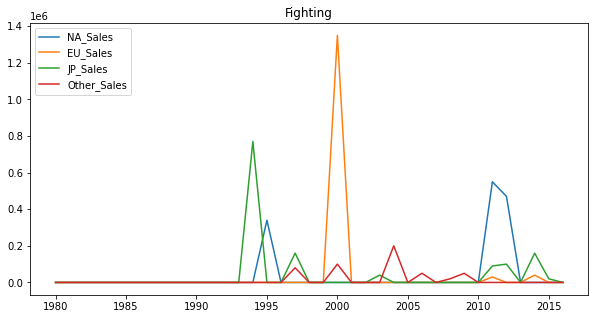

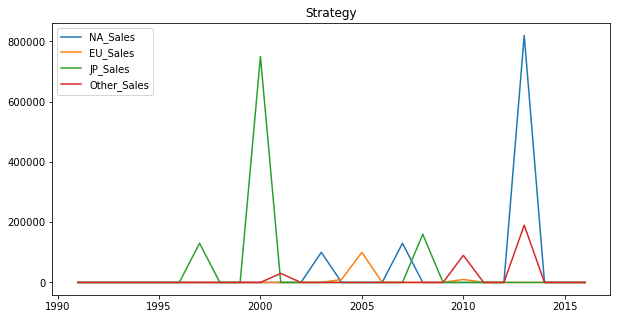

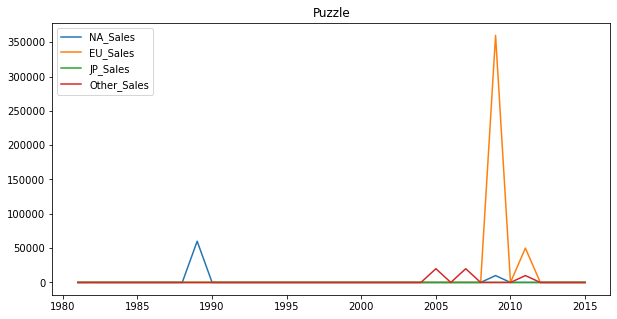

In [67]:
## Action
df_action_new = df_action.sort_values('Year')
# Action 장르에서 연도별 group by
action_grouped = df_action_new.groupby(df_action_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(action_grouped.index, action_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(action_grouped.index, action_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(action_grouped.index, action_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(action_grouped.index, action_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Action')
plt.show()

## sports
df_sports_new = df_sports.sort_values('Year')
# sports 장르에서 연도별 group by
sports_grouped = df_sports_new.groupby(df_sports_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(sports_grouped.index, sports_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(sports_grouped.index, sports_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(sports_grouped.index, sports_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(sports_grouped.index, sports_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Sports')
plt.show()


## Misc
df_misc_new = df_misc.sort_values('Year')
# Misc 장르에서 연도별 group by
misc_grouped = df_misc_new.groupby(df_misc_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(misc_grouped.index, misc_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(misc_grouped.index, misc_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(misc_grouped.index, misc_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(misc_grouped.index, misc_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Misc')
plt.show()


## Role Playing
df_roleplaying_new = df_roleplaying.sort_values('Year')
# Role Playing 장르에서 연도별 group by
roleplaying_grouped = df_roleplaying_new.groupby(df_roleplaying_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(roleplaying_grouped.index, roleplaying_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Role Playing')
plt.show()


## shooter
df_shooter_new = df_shooter.sort_values('Year')
# shooter 장르에서 연도별 group by
shooter_grouped = df_shooter_new.groupby(df_shooter_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(shooter_grouped.index, shooter_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Shooter')
plt.show()


## adventure
df_adventure_new = df_adventure.sort_values('Year')
# adventure 장르에서 연도별 group by
adventure_grouped = df_adventure_new.groupby(df_adventure_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(adventure_grouped.index, adventure_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Adventure')
plt.show()


## racing
df_racing_new = df_racing.sort_values('Year')
# racing 장르에서 연도별 group by
racing_grouped = df_racing_new.groupby(df_racing_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(racing_grouped.index, racing_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(racing_grouped.index, racing_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(racing_grouped.index, racing_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(racing_grouped.index, racing_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Racing')
plt.show()


## platform
df_platform_new = df_platform.sort_values('Year')
# platform 장르에서 연도별 group by
platform_grouped = df_platform_new.groupby(df_platform_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(platform_grouped.index, platform_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(platform_grouped.index, platform_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(platform_grouped.index, platform_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(platform_grouped.index, platform_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Platform')
plt.show()


## simulation
df_simulation_new = df_simulation.sort_values('Year')
# simulation 장르에서 연도별 group by
simulation_grouped = df_simulation_new.groupby(df_simulation_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(simulation_grouped.index, simulation_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Simulation')
plt.show()


## fighting
df_fighting_new = df_fighting.sort_values('Year')
# fighting 장르에서 연도별 group by
fighting_grouped = df_fighting_new.groupby(df_fighting_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(fighting_grouped.index, fighting_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Fighting')
plt.show()


## strategy
df_strategy_new = df_strategy.sort_values('Year')
# strategy 장르에서 연도별 group by
strategy_grouped = df_strategy_new.groupby(df_strategy_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(strategy_grouped.index, strategy_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Strategy')
plt.show()


## puzzle
df_puzzle_new = df_puzzle.sort_values('Year')
# puzzle 장르에서 연도별 group by
puzzle_grouped = df_puzzle_new.groupby(df_puzzle_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(puzzle_grouped.index, puzzle_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.Other_Sales, label = 'Other_Sales')

ax.legend(loc = 'upper left')
plt.title('Puzzle')
plt.show()

### 2.2 각 장르의 연도별 출시 게임 수

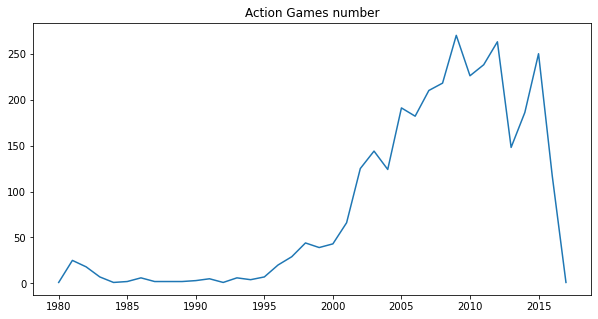

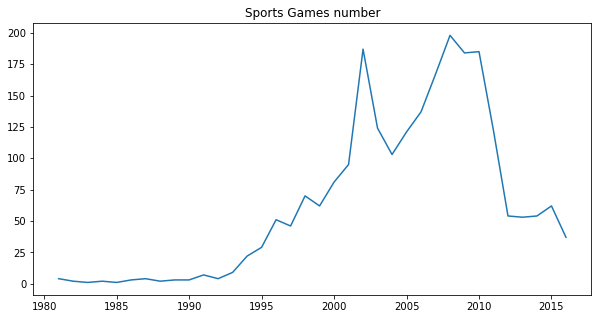

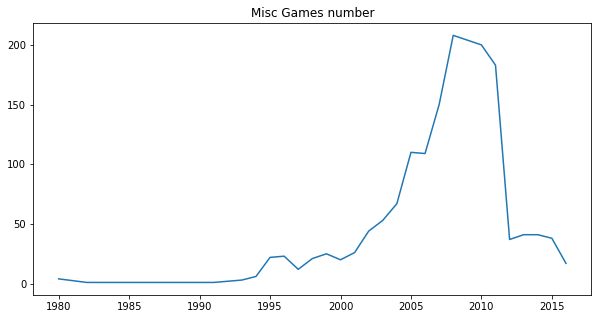

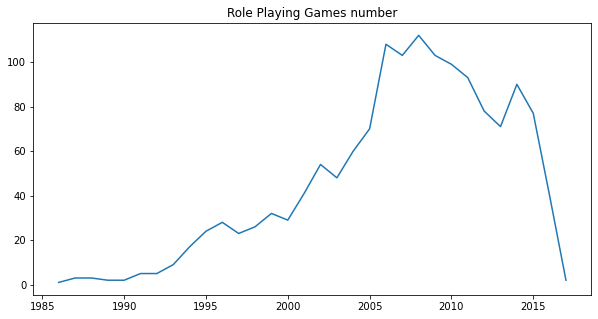

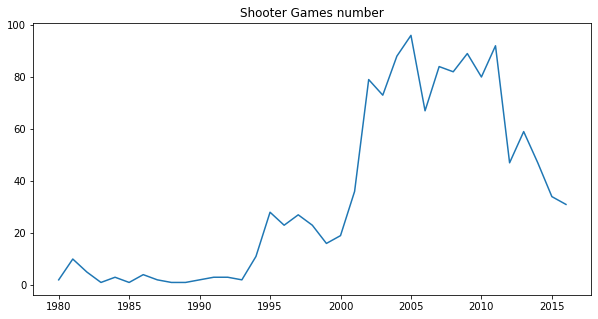

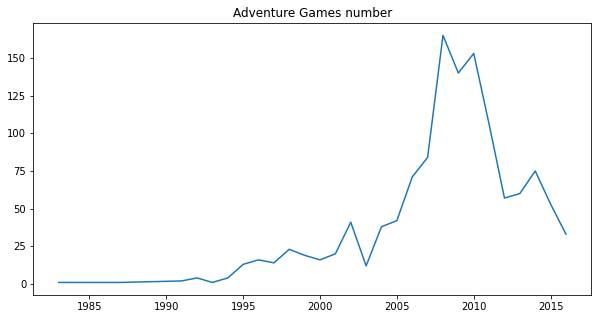

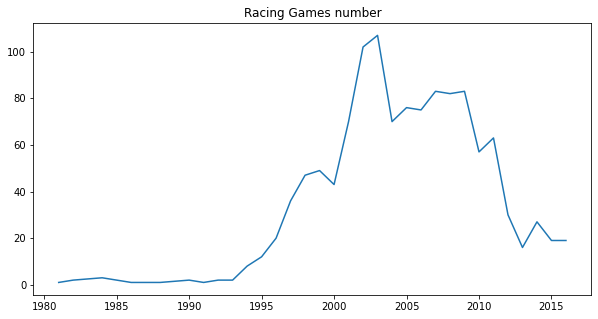

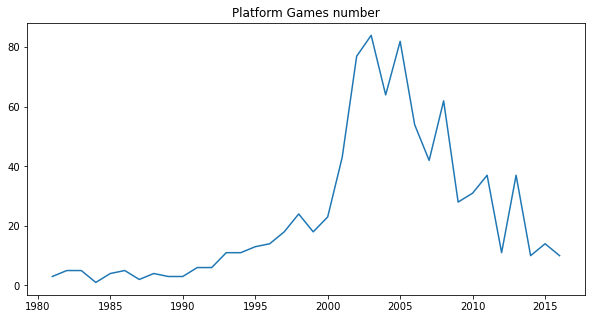

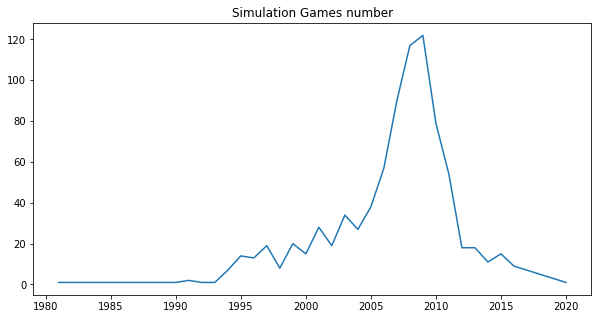

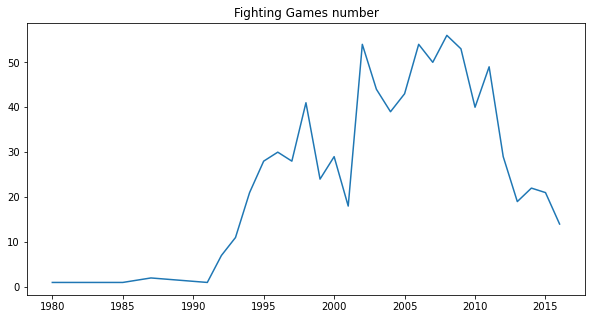

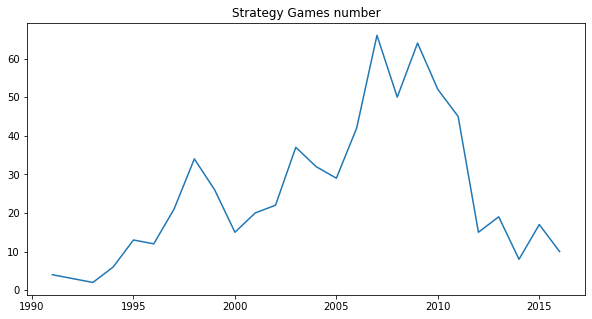

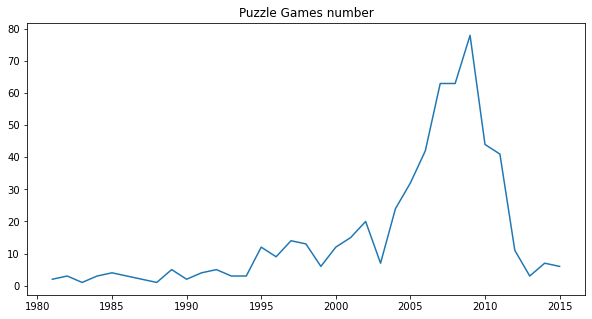

In [30]:
# Action 장르의 연도별 출시 게임 수
action_grouped_cnt = df_action_new.groupby(df_action_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(action_grouped_cnt.index, action_grouped_cnt.Name)
plt.title('Action Games number')
plt.show()

# Sports 장르의 연도별 출시 게임 수
sports_grouped_cnt = df_sports_new.groupby(df_sports_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(sports_grouped_cnt.index, sports_grouped_cnt.Name)
plt.title('Sports Games number')
plt.show()

# Misc 장르의 연도별 출시 게임 수
misc_grouped_cnt = df_misc_new.groupby(df_misc_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(misc_grouped_cnt.index, misc_grouped_cnt.Name)
plt.title('Misc Games number')
plt.show()

# RolePlaying 장르의 연도별 출시 게임 수
roleplaying_grouped_cnt = df_roleplaying_new.groupby(df_roleplaying_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(roleplaying_grouped_cnt.index, roleplaying_grouped_cnt.Name)
plt.title('Role Playing Games number')
plt.show()

# Shooter 장르의 연도별 출시 게임 수
shooter_grouped_cnt = df_shooter_new.groupby(df_shooter_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(shooter_grouped_cnt.index, shooter_grouped_cnt.Name)
plt.title('Shooter Games number')
plt.show()

# Adventure 장르의 연도별 출시 게임 수
adventure_grouped_cnt = df_adventure_new.groupby(df_adventure_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(adventure_grouped_cnt.index, adventure_grouped_cnt.Name)
plt.title('Adventure Games number')
plt.show()

# Racing 장르의 연도별 출시 게임 수
racing_grouped_cnt = df_racing_new.groupby(df_racing_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(racing_grouped_cnt.index, racing_grouped_cnt.Name)
plt.title('Racing Games number')
plt.show()

# Platform 장르의 연도별 출시 게임 수
platform_grouped_cnt = df_platform_new.groupby(df_platform_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(platform_grouped_cnt.index, platform_grouped_cnt.Name)
plt.title('Platform Games number')
plt.show()

# Simulation 장르의 연도별 출시 게임 수
simulation_grouped_cnt = df_simulation_new.groupby(df_simulation_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(simulation_grouped_cnt.index, simulation_grouped_cnt.Name)
plt.title('Simulation Games number')
plt.show()

# Fighting 장르의 연도별 출시 게임 수
fighting_grouped_cnt = df_fighting_new.groupby(df_fighting_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(fighting_grouped_cnt.index, fighting_grouped_cnt.Name)
plt.title('Fighting Games number')
plt.show()

# Strategy 장르의 연도별 출시 게임 수
strategy_grouped_cnt = df_strategy_new.groupby(df_strategy_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(strategy_grouped_cnt.index, strategy_grouped_cnt.Name)
plt.title('Strategy Games number')
plt.show()

# Puzzle 장르의 연도별 출시 게임 수
puzzle_grouped_cnt = df_puzzle_new.groupby(df_puzzle_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(puzzle_grouped_cnt.index, puzzle_grouped_cnt.Name)
plt.title('Puzzle Games number')
plt.show()

- 연도별 장르 게임 출시 수를 한 그래프에 나타내보았다.

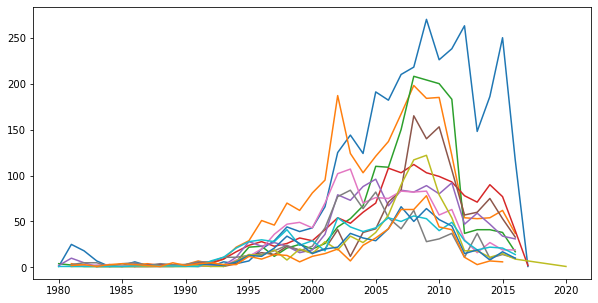

In [31]:
# Action 장르의 연도별 출시 게임 수
action_grouped_cnt = df_action_new.groupby(df_action_new['Year']).count()
# Sports 장르의 연도별 출시 게임 수
sports_grouped_cnt = df_sports_new.groupby(df_sports_new['Year']).count()
# Misc 장르의 연도별 출시 게임 수
misc_grouped_cnt = df_misc_new.groupby(df_misc_new['Year']).count()
# RolePlaying 장르의 연도별 출시 게임 수
roleplaying_grouped_cnt = df_roleplaying_new.groupby(df_roleplaying_new['Year']).count()
# Shooter 장르의 연도별 출시 게임 수
shooter_grouped_cnt = df_shooter_new.groupby(df_shooter_new['Year']).count()
# Adventure 장르의 연도별 출시 게임 수
adventure_grouped_cnt = df_adventure_new.groupby(df_adventure_new['Year']).count()
# Racing 장르의 연도별 출시 게임 수
racing_grouped_cnt = df_racing_new.groupby(df_racing_new['Year']).count()
# Platform 장르의 연도별 출시 게임 수
platform_grouped_cnt = df_platform_new.groupby(df_platform_new['Year']).count()
# Simulation 장르의 연도별 출시 게임 수
simulation_grouped_cnt = df_simulation_new.groupby(df_simulation_new['Year']).count()
# Fighting 장르의 연도별 출시 게임 수
fighting_grouped_cnt = df_fighting_new.groupby(df_fighting_new['Year']).count()
# Strategy 장르의 연도별 출시 게임 수
strategy_grouped_cnt = df_strategy_new.groupby(df_strategy_new['Year']).count()
# Puzzle 장르의 연도별 출시 게임 수
puzzle_grouped_cnt = df_puzzle_new.groupby(df_puzzle_new['Year']).count()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(action_grouped_cnt.index, action_grouped_cnt.Name)
ax.plot(sports_grouped_cnt.index, sports_grouped_cnt.Name)
ax.plot(misc_grouped_cnt.index, misc_grouped_cnt.Name)
ax.plot(roleplaying_grouped_cnt.index, roleplaying_grouped_cnt.Name)
ax.plot(shooter_grouped_cnt.index, shooter_grouped_cnt.Name)
ax.plot(adventure_grouped_cnt.index, adventure_grouped_cnt.Name)
ax.plot(racing_grouped_cnt.index, racing_grouped_cnt.Name)
ax.plot(platform_grouped_cnt.index, platform_grouped_cnt.Name)
ax.plot(simulation_grouped_cnt.index, simulation_grouped_cnt.Name)
ax.plot(fighting_grouped_cnt.index, fighting_grouped_cnt.Name)
ax.plot(strategy_grouped_cnt.index, strategy_grouped_cnt.Name)
ax.plot(puzzle_grouped_cnt.index, puzzle_grouped_cnt.Name)

plt.show()

### 지역별 연도에 따른 장르 출고량 추세를 보려고한다. 이에 증감 추세만을 파악하기 위해 scale을 해서 12개 장르를 한 눈에 살펴보았다.

In [68]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['NA_Sales']])
action_grouped['NA_SCALE'] = scaler.transform(action_grouped[['NA_Sales']])

#Sports
scaler.fit(sports_grouped[['NA_Sales']])
sports_grouped['NA_SCALE'] = scaler.transform(sports_grouped[['NA_Sales']])

#Misc
scaler.fit(misc_grouped[['NA_Sales']])
misc_grouped['NA_SCALE'] = scaler.transform(misc_grouped[['NA_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['NA_Sales']])
roleplaying_grouped['NA_SCALE'] = scaler.transform(roleplaying_grouped[['NA_Sales']])

#Shooter
scaler.fit(shooter_grouped[['NA_Sales']])
shooter_grouped['NA_SCALE'] = scaler.transform(shooter_grouped[['NA_Sales']])

#Adventure
scaler.fit(adventure_grouped[['NA_Sales']])
adventure_grouped['NA_SCALE'] = scaler.transform(adventure_grouped[['NA_Sales']])

#Racing
scaler.fit(racing_grouped[['NA_Sales']])
racing_grouped['NA_SCALE'] = scaler.transform(racing_grouped[['NA_Sales']])

#Platform
scaler.fit(platform_grouped[['NA_Sales']])
platform_grouped['NA_SCALE'] = scaler.transform(platform_grouped[['NA_Sales']])

#Simulation
scaler.fit(simulation_grouped[['NA_Sales']])
simulation_grouped['NA_SCALE'] = scaler.transform(simulation_grouped[['NA_Sales']])

#Fighting
scaler.fit(fighting_grouped[['NA_Sales']])
fighting_grouped['NA_SCALE'] = scaler.transform(fighting_grouped[['NA_Sales']])

#Strategy
scaler.fit(strategy_grouped[['NA_Sales']])
strategy_grouped['NA_SCALE'] = scaler.transform(strategy_grouped[['NA_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['NA_Sales']])
puzzle_grouped['NA_SCALE'] = scaler.transform(puzzle_grouped[['NA_Sales']])

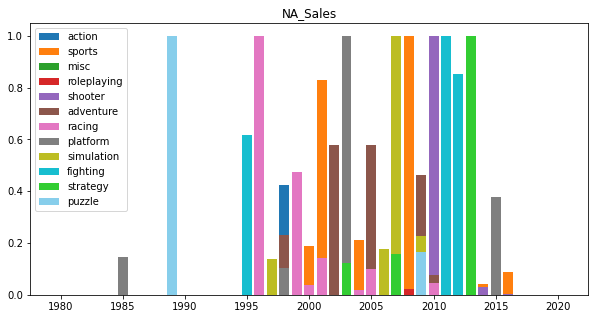

In [88]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.NA_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.NA_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.NA_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.NA_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.NA_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.NA_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.NA_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.NA_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.NA_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.NA_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.NA_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.NA_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('NA_Sales')
plt.show()

### EU 지역 scale

In [80]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['EU_Sales']])
action_grouped['EU_SCALE'] = scaler.transform(action_grouped[['EU_Sales']])

#Sports
scaler.fit(sports_grouped[['EU_Sales']])
sports_grouped['EU_SCALE'] = scaler.transform(sports_grouped[['EU_Sales']])

#Misc
scaler.fit(misc_grouped[['EU_Sales']])
misc_grouped['EU_SCALE'] = scaler.transform(misc_grouped[['EU_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['EU_Sales']])
roleplaying_grouped['EU_SCALE'] = scaler.transform(roleplaying_grouped[['EU_Sales']])

#Shooter
scaler.fit(shooter_grouped[['EU_Sales']])
shooter_grouped['EU_SCALE'] = scaler.transform(shooter_grouped[['EU_Sales']])

#Adventure
scaler.fit(adventure_grouped[['EU_Sales']])
adventure_grouped['EU_SCALE'] = scaler.transform(adventure_grouped[['EU_Sales']])

#Racing
scaler.fit(racing_grouped[['EU_Sales']])
racing_grouped['EU_SCALE'] = scaler.transform(racing_grouped[['EU_Sales']])

#Platform
scaler.fit(platform_grouped[['EU_Sales']])
platform_grouped['EU_SCALE'] = scaler.transform(platform_grouped[['EU_Sales']])

#Simulation
scaler.fit(simulation_grouped[['EU_Sales']])
simulation_grouped['EU_SCALE'] = scaler.transform(simulation_grouped[['EU_Sales']])

#Fighting
scaler.fit(fighting_grouped[['EU_Sales']])
fighting_grouped['EU_SCALE'] = scaler.transform(fighting_grouped[['EU_Sales']])

#Strategy
scaler.fit(strategy_grouped[['EU_Sales']])
strategy_grouped['EU_SCALE'] = scaler.transform(strategy_grouped[['EU_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['EU_Sales']])
puzzle_grouped['EU_SCALE'] = scaler.transform(puzzle_grouped[['EU_Sales']])

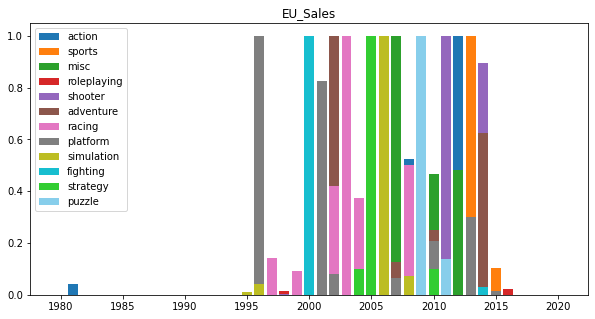

In [87]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.EU_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.EU_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.EU_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.EU_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.EU_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.EU_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.EU_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.EU_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.EU_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.EU_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.EU_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.EU_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('EU_Sales')
plt.show()

### JP 지역

In [83]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['JP_Sales']])
action_grouped['JP_SCALE'] = scaler.transform(action_grouped[['JP_Sales']])

#Sports
scaler.fit(sports_grouped[['JP_Sales']])
sports_grouped['JP_SCALE'] = scaler.transform(sports_grouped[['JP_Sales']])

#Misc
scaler.fit(misc_grouped[['JP_Sales']])
misc_grouped['JP_SCALE'] = scaler.transform(misc_grouped[['JP_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['JP_Sales']])
roleplaying_grouped['JP_SCALE'] = scaler.transform(roleplaying_grouped[['JP_Sales']])

#Shooter
scaler.fit(shooter_grouped[['JP_Sales']])
shooter_grouped['JP_SCALE'] = scaler.transform(shooter_grouped[['JP_Sales']])

#Adventure
scaler.fit(adventure_grouped[['JP_Sales']])
adventure_grouped['JP_SCALE'] = scaler.transform(adventure_grouped[['JP_Sales']])

#Racing
scaler.fit(racing_grouped[['JP_Sales']])
racing_grouped['JP_SCALE'] = scaler.transform(racing_grouped[['JP_Sales']])

#Platform
scaler.fit(platform_grouped[['JP_Sales']])
platform_grouped['JP_SCALE'] = scaler.transform(platform_grouped[['JP_Sales']])

#Simulation
scaler.fit(simulation_grouped[['JP_Sales']])
simulation_grouped['JP_SCALE'] = scaler.transform(simulation_grouped[['JP_Sales']])

#Fighting
scaler.fit(fighting_grouped[['JP_Sales']])
fighting_grouped['JP_SCALE'] = scaler.transform(fighting_grouped[['JP_Sales']])

#Strategy
scaler.fit(strategy_grouped[['JP_Sales']])
strategy_grouped['JP_SCALE'] = scaler.transform(strategy_grouped[['JP_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['JP_Sales']])
puzzle_grouped['JP_SCALE'] = scaler.transform(puzzle_grouped[['JP_Sales']])

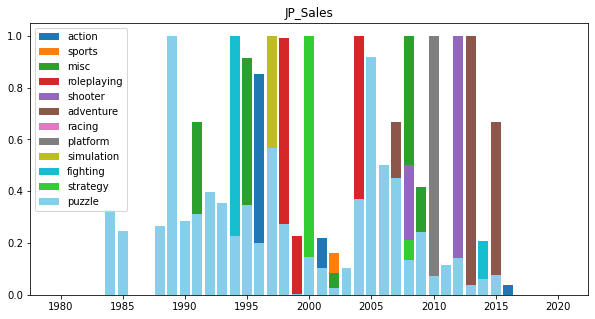

In [89]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.JP_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.JP_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.JP_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.JP_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.JP_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.JP_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.JP_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.JP_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.JP_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.JP_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.JP_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.JP_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('JP_Sales')
plt.show()

### Other 지역

In [85]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['Other_Sales']])
action_grouped['Other_SCALE'] = scaler.transform(action_grouped[['Other_Sales']])

#Sports
scaler.fit(sports_grouped[['Other_Sales']])
sports_grouped['Other_SCALE'] = scaler.transform(sports_grouped[['Other_Sales']])

#Misc
scaler.fit(misc_grouped[['Other_Sales']])
misc_grouped['Other_SCALE'] = scaler.transform(misc_grouped[['Other_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['Other_Sales']])
roleplaying_grouped['Other_SCALE'] = scaler.transform(roleplaying_grouped[['Other_Sales']])

#Shooter
scaler.fit(shooter_grouped[['Other_Sales']])
shooter_grouped['Other_SCALE'] = scaler.transform(shooter_grouped[['Other_Sales']])

#Adventure
scaler.fit(adventure_grouped[['Other_Sales']])
adventure_grouped['Other_SCALE'] = scaler.transform(adventure_grouped[['Other_Sales']])

#Racing
scaler.fit(racing_grouped[['Other_Sales']])
racing_grouped['Other_SCALE'] = scaler.transform(racing_grouped[['Other_Sales']])

#Platform
scaler.fit(platform_grouped[['Other_Sales']])
platform_grouped['Other_SCALE'] = scaler.transform(platform_grouped[['Other_Sales']])

#Simulation
scaler.fit(simulation_grouped[['Other_Sales']])
simulation_grouped['Other_SCALE'] = scaler.transform(simulation_grouped[['Other_Sales']])

#Fighting
scaler.fit(fighting_grouped[['Other_Sales']])
fighting_grouped['Other_SCALE'] = scaler.transform(fighting_grouped[['Other_Sales']])

#Strategy
scaler.fit(strategy_grouped[['Other_Sales']])
strategy_grouped['Other_SCALE'] = scaler.transform(strategy_grouped[['Other_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['Other_Sales']])
puzzle_grouped['Other_SCALE'] = scaler.transform(puzzle_grouped[['Other_Sales']])

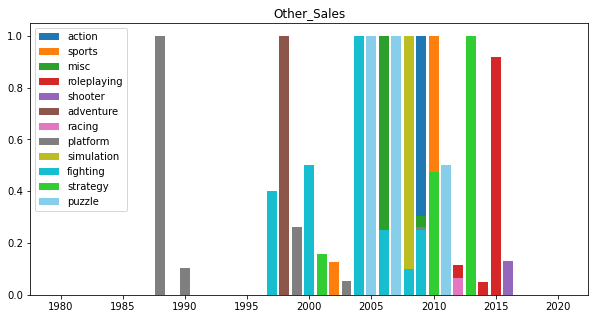

In [90]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.Other_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.Other_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.Other_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.Other_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.Other_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.Other_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.Other_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.Other_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.Other_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.Other_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.Other_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.Other_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('Other_Sales')
plt.show()